Scores PageRank par nœud :
 {2: 38.440115097283886, 3: 34.29100833490957, 4: 3.9087092099966094, 1: 3.2781493159344, 5: 8.088569323449773, 6: 3.9087092099966094, 7: 1.6169479016858403, 8: 1.6169479016858403, 9: 1.6169479016858403, 10: 1.6169479016858403, 11: 1.6169479016858403}


C:\Users\mon pc\AppData\Local\Temp\ipykernel_17088\2902330875.py:83: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='PageRank Score')


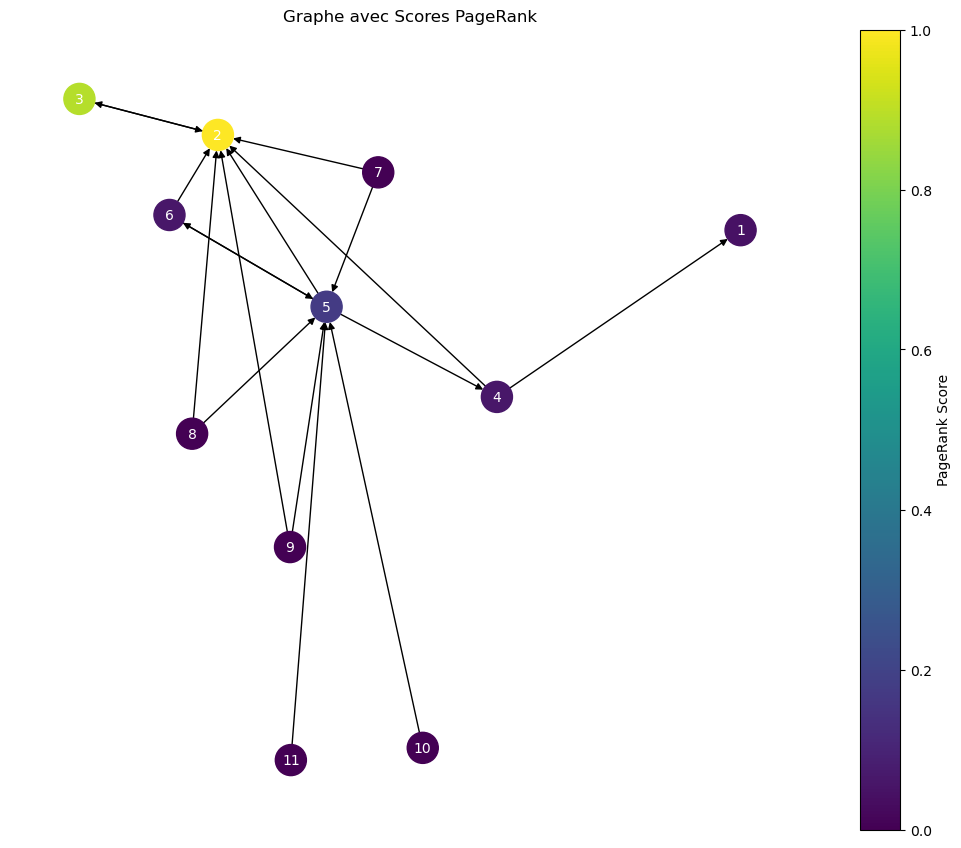

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def compute_transition_row(adj_row: np.ndarray, N: int, lambda_: float):
    """
    Calcule une ligne de la matrice de transition pour un nœud donné.
    :param adj_row: Ligne de la matrice d'adjacence représentant les liens sortants
    :param N: Nombre total de nœuds
    :param lambda_: Facteur d'amortissement (généralement 0.85)
    :return: Ligne de la matrice de transition pour ce nœud
    """
    row_sum = np.sum(adj_row)  # Somme des liens sortants
    if row_sum != 0:
        # Si le nœud a des liens sortants
        return lambda_ * adj_row / row_sum + (1 - lambda_) / N
    else:
        # Si le nœud n'a pas de liens sortants, répartir uniformément
        return np.ones(N) / N

def page_ranks_score(transition_matrix: np.ndarray, lambda_: float = 0.85, epsilon: float = 1e-6):
    """
    Calcul du score PageRank basé sur l'équation 1 pour une matrice de transition donnée.
    :param transition_matrix: Matrice de transition (probabilité) du graphe
    :param lambda_: Facteur d'amortissement (généralement 0.85)
    :param epsilon: Seuil de convergence
    :return: Vecteur PageRank
    """
    # Nombre de nœuds (pages)
    N = transition_matrix.shape[0]

    # Initialisation du vecteur PageRank
    pagerank = np.ones(N) / N

    # Algorithme d'itération jusqu'à convergence
    diff = 1
    while diff > epsilon:
        new_pagerank = np.dot(transition_matrix.T, pagerank)  # Multiplier par la transposée
        diff = np.linalg.norm(new_pagerank - pagerank, ord=1)  # Différence L1 pour convergence
        pagerank = new_pagerank
    pagerank *= 100

    return pagerank

def create_transition_matrix(graph: nx.Graph, lambda_: float = 0.85):
    """
    Crée une matrice de transition à partir d'un graphe donné.
    :param graph: Un graphe NetworkX
    :param lambda_: Facteur d'amortissement (généralement 0.85)
    :return: Matrice de transition
    """
    # Convertir le graphe en matrice d'adjacence
    adjM = nx.to_numpy_array(graph)
    N = adjM.shape[0]
    
    # Matrice de transition
    transition_matrix = np.zeros_like(adjM, dtype=float)
    
    # Remplir la matrice de transition
    for i in range(N):
        transition_matrix[i, :] = compute_transition_row(adjM[i, :], N, lambda_)
    
    return transition_matrix

def draw_graph(graph: nx.Graph, pagerank: np.ndarray):
    """
    Affiche le graphe avec les scores PageRank.
    :param graph: Un graphe NetworkX
    :param pagerank: Vecteur PageRank
    """
    # Normalisation des scores pour la couleur des nœuds
    node_colors = pagerank / np.max(pagerank)

    # Dessin du graphe
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)  # Disposition du graphe
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, 
            node_size=500, font_size=10, font_color='white')
    
    # Ajout d'une barre de couleur
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    plt.colorbar(sm, label='PageRank Score')
    
    plt.title("Graphe avec Scores PageRank")
    plt.show()

# Exemple d'utilisation avec un graphe orienté
if __name__ == "__main__": 
    # Création d'un graphe orienté avec NetworkX
    G = nx.DiGraph()

    # Ajout des arêtes (edges) selon ton graphe
    edges = [(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4), (5, 6), 
             (6, 2), (6, 5), (7, 2), (7, 5), (8, 2), (8, 5), (9, 2), 
             (9, 5), (10, 5), (11, 5)]
    G.add_edges_from(edges)
    
    # Création de la matrice de transition
    transition_matrix = create_transition_matrix(G)

    # Calcul des scores PageRank
    scores = page_ranks_score(transition_matrix)
    
    # Association des scores aux nœuds
    pagerank_dict = dict(zip(G.nodes(), scores))
    print("Scores PageRank par nœud :\n", pagerank_dict)
    
    # Dessin du graphe
    draw_graph(G, scores)


In [2]:
import numpy as np

def calculate_transition_matrix(adjM: np.ndarray, lambda_: float = 0.85):
    """
    Calcule la matrice de transition à partir d'une matrice d'adjacence.
    :param adjM: Matrice d'adjacence du graphe
    :param lambda_: Facteur d'amortissement (généralement 0.85)
    :return: Matrice de transition
    """
    # Nombre de nœuds (pages)
    N = adjM.shape[0]
    
    # Matrice de transition
    transition_matrix = np.zeros_like(adjM, dtype=float)
    
    for i in range(N):
        row_sum = np.sum(adjM[i, :])  # Somme des lignes (liens sortants)
        if row_sum != 0:
            # Si le noeud a des liens sortants
            transition_matrix[i, :] = lambda_ * adjM[i, :] / row_sum + (1 - lambda_) / N
        else:
            # Sinon, répartir uniformément
            transition_matrix[i, :] = 1 / N
            
    return transition_matrix

def page_ranks_score(adjM: np.ndarray, lambda_: float = 0.85, epsilon: float = 1e-6):
    """
    Calcul du score PageRank basé sur l'équation 1
    :param adjM: Matrice d'adjacence du graphe
    :param lambda_: Facteur d'amortissement (généralement 0.85)
    :param epsilon: Seuil de convergence
    :return: Vecteur PageRank
    """
    # Créer la matrice de transition à partir de la matrice d'adjacence
    transition_matrix = calculate_transition_matrix(adjM, lambda_)

    # Nombre de nœuds (pages)
    N = adjM.shape[0]

    # Initialisation du vecteur PageRank
    pagerank = np.ones(N) / N

    # Algorithme d'itération jusqu'à convergence
    diff = 1
    while diff > epsilon:
        new_pagerank = np.dot(transition_matrix.T, pagerank)  # Multiplier par la transposée
        diff = np.linalg.norm(new_pagerank - pagerank, ord=1)  # Différence L1 pour convergence
        pagerank = new_pagerank
    pagerank *= 100

    return pagerank

# Exemple d'utilisation
if __name__ == "__main__":
    # Matrice d'adjacence basée sur le graphe fourni
    adjM = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
                    ])
    
    # Calcul des scores PageRank
    scores = page_ranks_score(adjM)
    print("Scores PageRank:\n", scores)


Scores PageRank:
 [ 3.27814932 38.4401151  34.29100833  3.90870921  8.08856932  3.90870921
  1.6169479   1.6169479   1.6169479   1.6169479   1.6169479 ]


In [3]:
import numpy as np
import networkx as nx
import xml.etree.ElementTree as ET

def create_xml_file(graph: nx.Graph, filename: str):
    """
    Crée un fichier XML à partir d'un graphe NetworkX.
    :param graph: Un graphe NetworkX
    :param filename: Le nom du fichier XML à créer
    """
    root = ET.Element("graph")
    
    # Ajouter des nœuds au XML
    for node in graph.nodes():
        node_element = ET.SubElement(root, "node")
        node_element.set("id", str(node))
    
    # Ajouter des arêtes au XML
    for source, target in graph.edges():
        edge_element = ET.SubElement(root, "edge")
        edge_element.set("source", str(source))
        edge_element.set("target", str(target))
    
    # Écrire dans le fichier XML
    tree = ET.ElementTree(root)
    tree.write(filename)

def compute_transition_matrix(adjM: np.ndarray, lambda_: float):
    """
    Calcule la matrice de transition à partir d'une matrice d'adjacence.
    :param adjM: Matrice d'adjacence
    :param lambda_: Facteur d'amortissement
    :return: Matrice de transition
    """
    N = adjM.shape[0]
    transition_matrix = np.zeros_like(adjM, dtype=float)
    
    for i in range(N):
        row_sum = np.sum(adjM[i, :])  # Somme des lignes (liens sortants)
        if row_sum != 0:
            # Si le noeud a des liens sortants
            transition_matrix[i, :] = lambda_ * adjM[i, :] / row_sum + (1 - lambda_) / N
        else:
            # Sinon, répartir uniformément
            transition_matrix[i, :] = 1 / N

    return transition_matrix

def compute_page_rank(transition_matrix: np.ndarray, epsilon: float):
    """
    Calcule le vecteur PageRank à partir d'une matrice de transition.
    :param transition_matrix: Matrice de transition
    :param epsilon: Seuil de convergence
    :return: Vecteur PageRank
    """
    N = transition_matrix.shape[0]
    pagerank = np.ones(N) / N  # Initialisation du vecteur PageRank

    # Algorithme d'itération jusqu'à convergence
    diff = 1
    while diff > epsilon:
        new_pagerank = np.dot(transition_matrix.T, pagerank)  # Multiplier par la transposée
        diff = np.linalg.norm(new_pagerank - pagerank, ord=1)  # Différence L1 pour convergence
        pagerank = new_pagerank

    return pagerank * 100  # Multiplier par 100 pour les scores en pourcentage

def page_ranks_score(xml_file: str, lambda_: float = 0.85, epsilon: float = 1e-6):
    """
    Calcul du score PageRank à partir d'un fichier XML décrivant un graphe.
    :param xml_file: Le chemin du fichier XML
    :param lambda_: Facteur d'amortissement (généralement 0.85)
    :param epsilon: Seuil de convergence
    :return: Vecteur PageRank
    """
    # Parser le fichier XML pour créer un graphe
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    G = nx.DiGraph()
    
    # Ajouter des nœuds
    for node in root.findall('node'):
        node_id = node.get('id')
        G.add_node(node_id)
        
    # Ajouter des arêtes
    for edge in root.findall('edge'):
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)
    
    # Convertir le graphe en matrice d'adjacence
    adjM = nx.to_numpy_array(G)

    # Calculer la matrice de transition
    transition_matrix = compute_transition_matrix(adjM, lambda_)

    # Calculer les scores PageRank
    pagerank = compute_page_rank(transition_matrix, epsilon)

    return pagerank

# Exemple d'utilisation
if __name__ == "__main__":
    # Création d'un graphe orienté avec NetworkX
    G = nx.DiGraph()

    # Ajout des arêtes (edges)
    edges = [(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4), (5, 6), 
             (6, 2), (6, 5), (7, 2), (7, 5), (8, 2), (8, 5), (9, 2), 
             (9, 5), (10, 5), (11, 5)]
    G.add_edges_from(edges)
    
    # Créer un fichier XML à partir du graphe
    create_xml_file(G, "graph1.xml")
    
    # Calcul des scores PageRank à partir du fichier XML
    scores = page_ranks_score("graph1.xml")
    print("Scores PageRank:\n", scores)


Scores PageRank:
 [38.4401151  34.29100833  3.90870921  3.27814932  8.08856932  3.90870921
  1.6169479   1.6169479   1.6169479   1.6169479   1.6169479 ]


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import tkinter as tk
from tkinter import filedialog, messagebox, simpledialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Functions for PageRank calculation
def compute_transition_row(adj_row: np.ndarray, N: int, lambda_: float):
    row_sum = np.sum(adj_row)
    if row_sum != 0:
        return lambda_ * adj_row / row_sum + (1 - lambda_) / N
    else:
        return np.ones(N) / N

def page_ranks_score(transition_matrix: np.ndarray, lambda_: float = 0.85, epsilon: float = 1e-6):
    N = transition_matrix.shape[0]
    pagerank = np.ones(N) / N
    diff = 1

    while diff > epsilon:
        new_pagerank = np.dot(transition_matrix.T, pagerank)
        diff = np.linalg.norm(new_pagerank - pagerank, ord=1)
        pagerank = new_pagerank

    return pagerank * 100

def create_transition_matrix(graph: nx.Graph, lambda_: float = 0.85):
    adjM = nx.to_numpy_array(graph)
    N = adjM.shape[0]
    transition_matrix = np.zeros_like(adjM, dtype=float)

    for i in range(N):
        transition_matrix[i, :] = compute_transition_row(adjM[i, :], N, lambda_)

    return transition_matrix

class PageRankApp:
    def __init__(self, root):
        self.root = root
        self.root.title("PageRank Application")
        self.root.geometry("600x600")

        # Main Frame for layout
        main_frame = tk.Frame(root, padx=10, pady=10)
        main_frame.pack(fill=tk.BOTH, expand=True)

        # Frame for buttons
        button_frame = tk.LabelFrame(main_frame, text="Actions", padx=10, pady=10)
        button_frame.pack(fill=tk.X, pady=10)

        tk.Button(button_frame, text="Charger un fichier XML", command=self.load_xml).grid(row=0, column=0, padx=5, pady=5)
        tk.Button(button_frame, text="Saisir un graphe manuellement", command=self.enter_graph_manually).grid(row=0, column=1, padx=5, pady=5)
        tk.Button(button_frame, text="Saisir une matrice d'adjacence", command=self.enter_adj_matrix).grid(row=0, column=2, padx=5, pady=5)
        tk.Button(button_frame, text="Calculer le PageRank", command=self.calculate_pagerank).grid(row=1, column=0, padx=5, pady=5, columnspan=2)
        tk.Button(button_frame, text="Afficher le Graphe", command=self.display_graph).grid(row=1, column=2, padx=5, pady=5)

        # Frame for displaying PageRank results
        result_frame = tk.LabelFrame(main_frame, text="Résultats PageRank", padx=10, pady=10)
        result_frame.pack(fill=tk.X, pady=10)

        self.result_text = tk.Text(result_frame, height=8, width=50, wrap="word")
        self.result_text.pack(fill=tk.X)

        # Frame for displaying the graph
        self.graph_frame = tk.LabelFrame(main_frame, text="Graphe", padx=10, pady=10)
        self.graph_frame.pack(fill=tk.BOTH, expand=True)

        self.graph = nx.DiGraph()
        self.pagerank = None

    def load_xml(self):
        filename = filedialog.askopenfilename(filetypes=[("XML files", "*.xml")])
        if filename:
            self.graph = self.create_graph_from_xml(filename)
            messagebox.showinfo("Succès", "Le fichier XML a été chargé avec succès!")

    def create_graph_from_xml(self, xml_file):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        G = nx.DiGraph()
        
        for node in root.findall('node'):
            node_id = node.get('id')
            G.add_node(node_id)
            
        for edge in root.findall('edge'):
            source = edge.get('source')
            target = edge.get('target')
            G.add_edge(source, target)
        
        return G

    def enter_graph_manually(self):
        num_nodes = simpledialog.askinteger("Input", "Nombre de nœuds dans le graphe:")
        if num_nodes is None:
            return

        self.graph.clear()
        self.graph.add_nodes_from(range(1, num_nodes + 1))

        num_edges = simpledialog.askinteger("Input", "Nombre d'arêtes dans le graphe:")
        if num_edges is None:
            return

        for _ in range(num_edges):
            source = simpledialog.askinteger("Input", "Source de l'arête:")
            target = simpledialog.askinteger("Input", "Cible de l'arête:")
            if source and target:
                self.graph.add_edge(source, target)

    def enter_adj_matrix(self):
        num_nodes = simpledialog.askinteger("Input", "Nombre de nœuds dans la matrice d'adjacence:")
        if num_nodes is None:
            return

        self.graph.clear()
        adj_matrix = []

        for i in range(num_nodes):
            row = simpledialog.askstring("Input", f"Ligne {i+1} (séparée par des espaces):")
            if row:
                adj_matrix.append(list(map(int, row.split())))

        adj_matrix = np.array(adj_matrix)
        self.graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    def calculate_pagerank(self):
        if self.graph.number_of_nodes() == 0:
            messagebox.showwarning("Erreur", "Veuillez d'abord définir un graphe.")
            return
        
        transition_matrix = create_transition_matrix(self.graph)
        self.pagerank = page_ranks_score(transition_matrix)
        pagerank_dict = dict(zip(self.graph.nodes(), self.pagerank))

        self.result_text.delete(1.0, tk.END)
        for node, score in pagerank_dict.items():
            self.result_text.insert(tk.END, f"Nœud {node}: {score:.2f}%\n")

    def display_graph(self):
        if self.pagerank is None:
            messagebox.showwarning("Erreur", "Veuillez calculer le PageRank avant d'afficher le graphe.")
            return
        
        for widget in self.graph_frame.winfo_children():
            widget.destroy()
        
        node_colors = self.pagerank / np.max(self.pagerank)
        fig, ax = plt.subplots(figsize=(6, 5))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis,
                node_size=500, font_size=10, font_color='white', ax=ax)
        
        sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
        sm.set_array([])
        plt.colorbar(sm, label='PageRank Score', ax=ax)
        plt.title("Graphe avec Scores PageRank")

        canvas = FigureCanvasTkAgg(fig, master=self.graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
if __name__ == "__main__":
    root = tk.Tk()
    app = PageRankApp(root)
    root.mainloop()
